In [1]:
import numpy as np

In [2]:
from inference.prepare import StockData

stockData = StockData()

In [3]:
array, tickers, dates = stockData.get_N_stocks(10)
print("Shape of the output array is: {}".format(array.shape))
print("Number of stocks observed is: {}".format(len(tickers)))
print("Number of observations is: {}".format(len(dates)))
print(array[:5])

Shape of the output array is: (12269, 10)
Number of stocks observed is: 10
Number of observations is: 12269
[[30.125       0.92592591  3.54166675  9.4375     18.22500038  9.15310669
   1.25        0.85677081  1.234375    1.9296875 ]
 [30.625       1.00823045  3.45833325  9.5625     18.29999924  9.58456612
   1.21875     0.85416669  1.2578125   1.9375    ]
 [31.          1.02469134  3.44791675  9.46875    18.41250038  9.76947689
   1.18923616  0.84375     1.25390625  1.96875   ]
 [30.75        1.02880657  3.33333325  9.4375     18.42499924  9.64620304
   1.21180558  0.8515625   1.25        1.96484375]
 [30.75        1.03292179  3.26041675  9.3125     18.4375      9.49211025
   1.20659721  0.85677081  1.234375    1.953125  ]]


In [4]:
from inference.sample import StockSampler

sampler = StockSampler(array, tickers, dates, m=6)

In [5]:
sampler.x

array([[ 30.125     ,   0.92592591,   3.54166675, ...,   0.85677081,
          1.234375  ,   1.9296875 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 71.27999878, 348.76998901, 137.82000732, ...,  45.65000153,
        132.61000061,  79.51999664]])

In [6]:
sampler.sample(100)

In [29]:
sampler.b2

array([[4.87187025, 1.75623059, 4.18784953, 3.02630421, 2.5670893 ,
        4.01119169, 3.87525262, 3.88111718, 6.74709118, 1.43509901],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.81705492, 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.82295664, 1.        , 0.84445451],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.82860043, 1.        , 0.84026166],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.82830048, 1.        , 0.84304029],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.83053187, 1.        , 0.84893623],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.8326595 , 1.        , 0.84850685],
       [1.        , 1.        , 1.       

In [30]:
np.min(sampler.x)

0.382716059684753

In [31]:
np.max(sampler.x)

1357.2336044394333

In [32]:
mu_ijk = sampler.x/np.roll(sampler.x, 1, axis=1)

In [33]:
mu_ijk.shape

(73609, 10)

In [34]:
sampler.x.shape

(73609, 10)

In [35]:
np.min(mu_ijk)

0.012122865178558368

In [36]:
np.max(mu_ijk)

25.117300838864274

In [37]:
np.min(sampler.etas)

0.3220325777412379

In [38]:
np.max(sampler.etas[0])

372.0

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
X = np.random.gamma([1,10,100,1000], 1/100000, size=(1000,4))
Y = 1/X

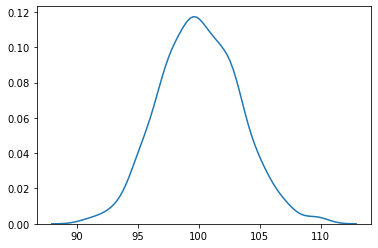

In [41]:
sns.kdeplot(Y[:,3])

In [42]:
mu = np.array(sampler.mu)

In [43]:
sampler.etas[1]

array([[ 30.125     ,   0.92592591,   3.54166675, ...,   0.85677081,
          1.234375  ,   1.9296875 ],
       [ 35.14583333,   1.0802469 ,   4.13194454, ...,   0.99956595,
          1.44010417,   2.25130208],
       [ 41.00347222,   1.26028804,   4.82060196, ...,   1.16616027,
          1.68012153,   2.6265191 ],
       ...,
       [130.98047274, 646.84346863, 257.60729732, ...,  85.0168893 ,
        247.34374754, 147.3947177 ],
       [152.81055153, 754.6507134 , 300.54184687, ...,  99.18637085,
        288.56770546, 171.96050398],
       [ 71.27999878, 348.76998901, 137.82000732, ...,  45.65000153,
        132.61000061,  79.51999664]])

In [44]:
sampler.theta

array([-0.20363301,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

In [45]:
sampler.b2[1]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.81705492, 1.        , 1.        , 1.        , 1.        ])

In [46]:
np.mean(sampler.etas[3])

51.09832380679672

In [47]:
sampler.prices_array

array([[ 30.125     ,   0.92592591,   3.54166675, ...,   0.85677081,
          1.234375  ,   1.9296875 ],
       [ 30.625     ,   1.00823045,   3.45833325, ...,   0.85416669,
          1.2578125 ,   1.9375    ],
       [ 31.        ,   1.02469134,   3.44791675, ...,   0.84375   ,
          1.25390625,   1.96875   ],
       ...,
       [ 71.80000305, 354.32000732, 140.32000732, ...,  46.34000015,
        135.05999756,  79.11000061],
       [ 70.69999695, 349.1499939 , 139.05000305, ...,  45.88999939,
        133.50999451,  79.55999756],
       [ 71.27999878, 348.76998901, 137.82000732, ...,  45.65000153,
        132.61000061,  79.51999664]])

In [48]:
sampler.etas[0][6]

array([30.625     ,  1.00823045,  3.45833325,  9.5625    , 18.29999924,
        9.58456612,  1.21875   ,  0.85416669,  1.2578125 ,  1.9375    ])

In [49]:
sampler.Rs[1][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])